# Satellite's orbit

We transform the differential equation $m\frac{d^{2}\vec{r}}{dt^{2}} = -\frac{\mathcal{G}mM}{r^{2}}\hat{r}$ into a first order differential system:
\begin{equation}
\begin{array}{rll}
\frac{d\vec{v}}{dt} &=& -\frac{\mathcal{G}M}{r^{2}}\hat{r} \\
\frac{d\vec{r}}{dt} &=& \vec{v}
\end{array}
\end{equation}

Which then leads after projection (remember $\sin\theta = x/r$ and $\cos\theta = y/r$):
\begin{equation}
\begin{array}{rll}
\frac{dv_{x}}{dt} &=& -\mathcal{G}M\frac{x}{(x^{2}+y^{2})^{3/2}} \\
\frac{dv_{y}}{dt} &=& -\mathcal{G}M\frac{y}{(x^{2}+y^{2})^{3/2}} \\
\frac{dx}{dt} &=& v_{x} \\
\frac{dy}{dt} &=& v_{y} \\
\end{array}
\end{equation}

Then we set up dimensionless quantities $\bar{x}$, $\bar{v}_{x}$, $\bar{y}$, $\bar{v}_{y}$ and $\tau$ such that $x = X_{0} \bar{x}$, $v_{x} = V_{0} \bar{v}_{x}$ and $t = T_{0}\tau$ with $X_{0} = r_{\text{planet}}$, $V_{0} = \sqrt{\mathcal{G}M/r_{\text{planet}}}$ and $T_{0} = \sqrt{r_{\text{planet}}^{3}/\mathcal{G}M}$

It leads to the following system:
\begin{equation}
\begin{array}{rllll}
\frac{d\bar{v}_{x}}{d\tau} &=& -\frac{\bar{x}}{(\bar{x}^{2}+\bar{y}^{2})^{3/2}} &=& f_{x}(\bar{x},\bar{y}) \\
\frac{d\bar{v}_{y}}{d\tau} &=& -\frac{\bar{y}}{(\bar{x}^{2}+\bar{y}^{2})^{3/2}} &=& f_{y}(\bar{x},\bar{y})\\
\frac{d\bar{x}}{d\tau} &=& \bar{v}_{x} \\
\frac{d\bar{y}}{d\tau} &=& \bar{v}_{y} \\
\end{array}
\end{equation}

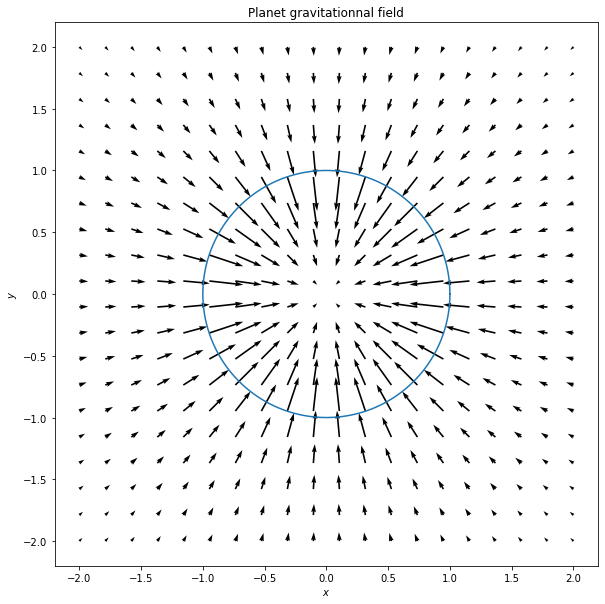

In [2]:
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt

def f_x(x, y):    # derivate of Vx
    r = np.sqrt(x**2 + y**2)
    return -x/(r**3)*(r > 1) - x/(1**3)*(r <= 1) # The second part for r <= 1 takes into account the 
                                                # potential inside the planet

def f_y(x, y):    # derivate of Vy
    r = np.sqrt(x**2 + y**2)
    return -y/(r**3)*(r > 1) - y/(1**3)*(r <= 1)

# Code to plot the gravitational field
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)

u, v = np.meshgrid(x, y)

U = f_x(u, v)
V = f_y(u, v)

Theta = np.linspace(0, 2*np.pi, 1000)

EarthX = 1*np.cos(Theta)   # planet X-position
EarthY = 1*np.sin(Theta)   # planet Y-position

fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.set_title('Planet gravitationnal field')
ax1.set(xlabel=r'$x$', ylabel=r'$y$')
Q = ax1.quiver(u, v, U, V, units='width')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(EarthX, EarthY)
plt.show()

In [3]:
# New set of arrows
xMax = 6
yMax = 6

x = np.linspace(-xMax, xMax, 20)
y = np.linspace(-yMax, yMax, 20)

u, v = np.meshgrid(x, y)

U = f_x(u, v)
V = f_y(u, v)

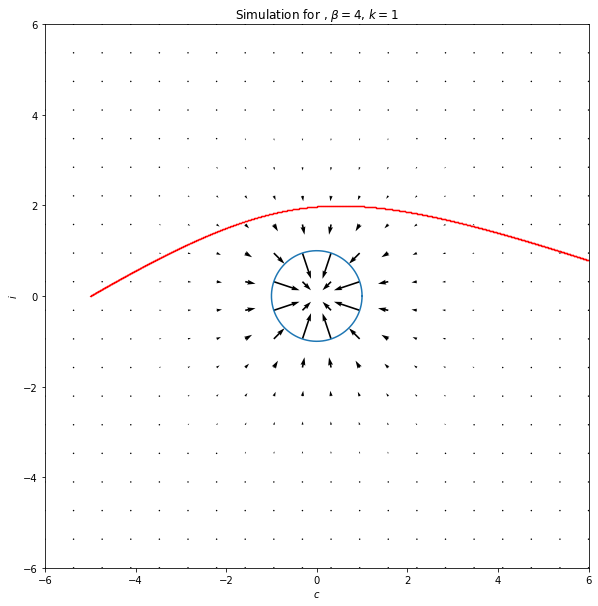

In [4]:
def advance(Vx, Vy, X, Y, t, dt):   # Vx, Vy, X, Y are arrays, t total time of the simulation, dt time step
    t_index = int(round(t/dt))
    Vx[t_index+1] = Vx[t_index] + f_x(X[t_index],Y[t_index])*dt
    Vy[t_index+1] = Vy[t_index] + f_y(X[t_index],Y[t_index])*dt
    X[t_index+1] = X[t_index] + Vx[t_index]*dt
    Y[t_index+1] = Y[t_index] + Vy[t_index]*dt

r0 = 5    # initial distance
def simulate(v0, sinTheta0):
    dt = 0.001
    Tmax = 50
    size_arr = int(Tmax/dt)+1
    T = np.linspace(0,Tmax,size_arr)
    Vx = np.zeros(size_arr)
    Vy = np.zeros(size_arr)
    X = np.zeros(size_arr)
    Y = np.zeros(size_arr)
    Vx[0] = v0*np.sqrt(1-sinTheta0**2)
    Vy[0] = v0*sinTheta0
    X[0] = -r0
    Y[0] = 0

    for t in T[:-1]:
        advance(Vx, Vy, X, Y, t, dt)
    
    return Vx, Vy, X, Y

Vx, Vy, X, Y = simulate(v0 = 1, sinTheta0 = 0.5)

fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.set_title(r'Simulation for , $\beta = 4$, $k=1$')
ax1.set(xlabel=r'$c$', ylabel=r'$i$')
Q = ax1.quiver(u, v, U, V, units='width', scale = 20)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(X, Y, 'ro', ms = 0.1)
plt.xlim(-xMax,xMax)
plt.ylim(-yMax,yMax)
plt.plot(EarthX, EarthY)
plt.show()

In [5]:
def plotFigure(ListXY, listVelocity):
    plt.figure(figsize=(8,8), dpi = 80)
    for i in range(len(ListXY)):
        x, y = ListXY[i]
        plt.plot(x, y, label = str(round(listVelocity[i], 2)))
    plt.plot(EarthX, EarthY, color = 'red', label = 'Planet')
    plt.plot(5*EarthX, 5*EarthY, '--b', label = '5 radius')
    plt.xlim(-xMax, xMax)
    plt.ylim(-yMax, yMax)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

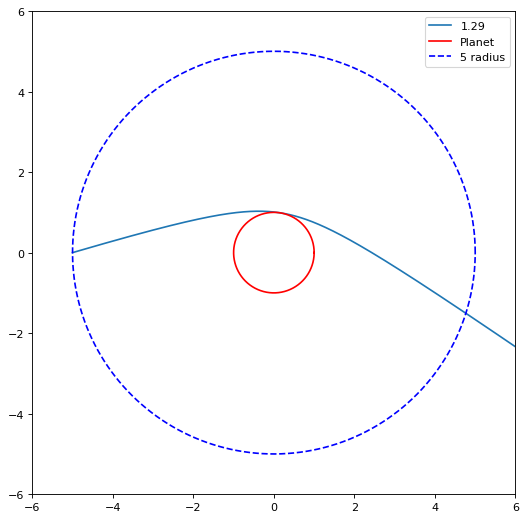

In [6]:
# I made the code a bit more complicated such that you don't have to recalculate the trajectories each time
# that you add new ones. But basically just creates a new trajectory with whatever initial velocity
# is added to vRange

vMin = np.sqrt(1/15)  # minimum acceptable speed
vRange = [5*vMin]
ListXY = []
for v in vRange:
    sinTheta0 = (1/5)*np.sqrt(8/(5*v**2)+1)
    Vx, Vy, X, Y = simulate(v, sinTheta0)
    ListXY += [[X, Y]]

plotFigure(ListXY, vRange)

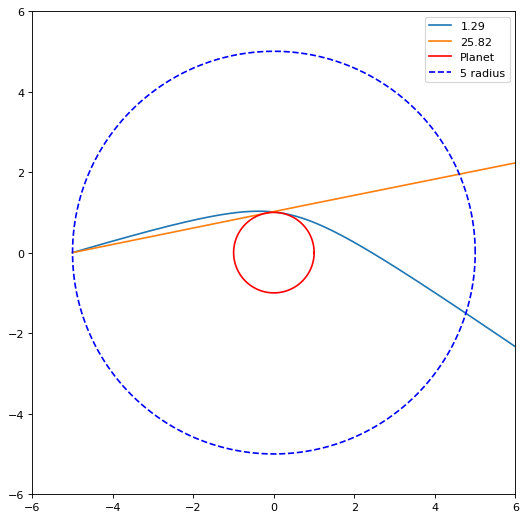

In [7]:
AddvRange = [100*vMin]
vRange += AddvRange
for v in AddvRange:
    sinTheta0 = (1/5)*np.sqrt(8/(5*v**2)+1)
    Vx, Vy, X, Y = simulate(v, sinTheta0)
    ListXY += [[X, Y]]

plotFigure(ListXY, vRange)

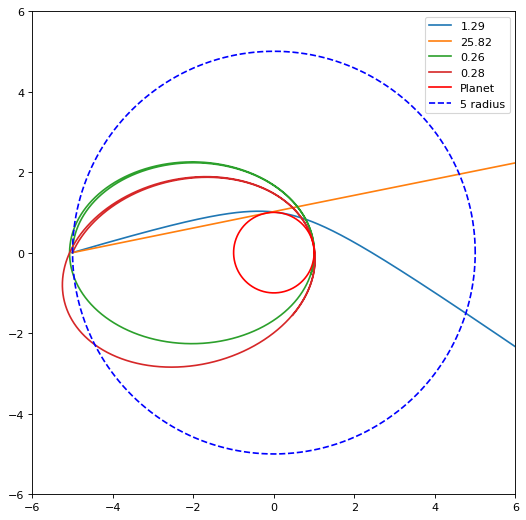

In [8]:
AddvRange = [1.00001*vMin, 1.1*vMin]
vRange += AddvRange
ListXY = []
for v in vRange:
    sinTheta0 = (1/5)*np.sqrt(8/(5*v**2)+1)
    Vx, Vy, X, Y = simulate(v, sinTheta0)
    ListXY += [[X, Y]]

plotFigure(ListXY, vRange)